# Ethan Enrique Verduzco Pérez | A01066955

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
     
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

 # Función obtenida de 
 # https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/             

## Datos

In [3]:
df = pd.read_csv('/content/water_potability (1).csv')

In [4]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Llenamos los valores faltantes con la media de los datos 

In [7]:
df['ph'].fillna(value=df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace=True)

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Normalizamos los datos 

In [9]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale, columns = df.columns)
df_scale

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


## Entrena por lo menos 2 algoritmos de clasificación


### SVC

#### Preprocessing


In [10]:
X = df_scale.drop('Potability', axis=1)
y = df_scale['Potability']

#### Train Test Split


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64

#### Training the Algorithm

To train the kernel SVM, we use the same SVC class of the Scikit-Learn's svm library. The difference lies in the value for the kernel parameter of the SVC class. In the case of the simple SVM we used "linear" as the value for the kernel parameter. However, for kernel SVM you can use Gaussian, polynomial, sigmoid, or computable kernel. 

#### Calibraciones SVC

##### 1. Polynomial Kernel


In the case of polynomial kernel, you also have to pass a value for the degree parameter of the SVC class. This basically is the degree of the polynomial.

In [12]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)
y_pred1 = svclassifier.predict(X_test)


Evaluating the Algorithm


In [13]:
metrics.accuracy_score(y_test, y_pred1)

0.6509146341463414

In [14]:
metrics.accuracy_score(y_test, y_pred1) #porcentaje de prediccion de valores verdaderos

0.6509146341463414

In [15]:
metrics.recall_score(y_test,y_pred1) #indica falsos negativos

0.2047244094488189

In [16]:
metrics.precision_score(y_test,y_pred1) #falsos positivos

0.6582278481012658

In [17]:
metrics.f1_score(y_test,y_pred1) #media armonica entre recall y presicion

0.3123123123123123

In [18]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[375  27]
 [202  52]]
              precision    recall  f1-score   support

         0.0       0.65      0.93      0.77       402
         1.0       0.66      0.20      0.31       254

    accuracy                           0.65       656
   macro avg       0.65      0.57      0.54       656
weighted avg       0.65      0.65      0.59       656



###### curva ROC y AUC

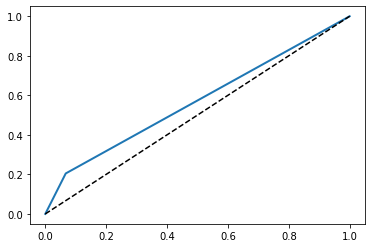

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

###### Cross Validation

In [20]:
SVC_result = cross_validation(svclassifier, X, y, 5)
print(SVC_result)

{'Training Accuracy scores': array([0.70267176, 0.69362839, 0.69591759, 0.70660053, 0.69133918]), 'Mean Training Accuracy': 69.80314896417951, 'Training Precision scores': array([0.77060134, 0.76570048, 0.77033493, 0.7804878 , 0.7751938 ]), 'Mean Training Precision': 0.7724636701904019, 'Training Recall scores': array([0.33855186, 0.30987292, 0.31476051, 0.3444227 , 0.29354207]), 'Mean Training Recall': 0.32023001302718496, 'Training F1 scores': array([0.47042828, 0.44119694, 0.44691187, 0.47793618, 0.42583392]), 'Mean Training F1 Score': 0.45246143886653767, 'Validation Accuracy scores': array([0.6402439 , 0.64122137, 0.65496183, 0.63664122, 0.67022901]), 'Mean Validation Accuracy': 64.86594675107057, 'Validation Precision scores': array([0.58333333, 0.66129032, 0.64948454, 0.58181818, 0.66393443]), 'Mean Validation Precision': 0.6279721600088285, 'Validation Recall scores': array([0.2734375 , 0.16078431, 0.24705882, 0.25      , 0.31640625]), 'Mean Validation Recall': 0.24953737745098

##### 2. Gaussian Kernel


To use Gaussian kernel, you have to specify 'rbf' as value for the Kernel parameter of the SVC class.



In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)


Prediction and Evaluation


In [22]:
metrics.accuracy_score(y_test, y_pred)

0.6646341463414634

In [23]:
metrics.accuracy_score(y_test, y_pred) #porcentaje de prediccion de valores verdaderos

0.6646341463414634

In [24]:
metrics.recall_score(y_test,y_pred) #indica falsos negativos

0.20866141732283464

In [25]:
metrics.precision_score(y_test,y_pred) #falsos positivos

0.7361111111111112

In [26]:
metrics.f1_score(y_test,y_pred) #media armonica entre recall y presicion

0.3251533742331288

In [27]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[383  19]
 [201  53]]
              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78       402
         1.0       0.74      0.21      0.33       254

    accuracy                           0.66       656
   macro avg       0.70      0.58      0.55       656
weighted avg       0.69      0.66      0.60       656



###### curva ROC y AUC

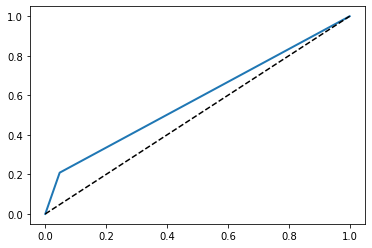

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

###### Cross Validation

In [29]:
SVC_result = cross_validation(svclassifier, X, y, 5)
print(SVC_result)

{'Training Accuracy scores': array([0.71564885, 0.70431133, 0.71423121, 0.72148035, 0.7050744 ]), 'Mean Training Accuracy': 71.2149229214419, 'Training Precision scores': array([0.84029484, 0.83695652, 0.8643617 , 0.87628866, 0.84297521]), 'Mean Training Precision': 0.852175386113403, 'Training Recall scores': array([0.33463796, 0.30107527, 0.31769306, 0.33268102, 0.29941292]), 'Mean Training Recall': 0.31710004533689906, 'Training F1 scores': array([0.4786564 , 0.44284687, 0.46461758, 0.4822695 , 0.44187726]), 'Mean Training F1 Score': 0.46205352393696864, 'Validation Accuracy scores': array([0.61585366, 0.65648855, 0.66259542, 0.61832061, 0.66259542]), 'Mean Validation Accuracy': 64.3170731707317, 'Validation Precision scores': array([0.51724138, 0.75862069, 0.70731707, 0.5375    , 0.69662921]), 'Mean Validation Precision': 0.643461671123879, 'Validation Recall scores': array([0.234375  , 0.17254902, 0.22745098, 0.16796875, 0.2421875 ]), 'Mean Validation Recall': 0.20890625, 'Validat

##### 3. Sigmoid Kernel


To use the sigmoid kernel, you have to specify 'sigmoid' as value for the kernel parameter of the SVC class.



In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

Prediction and Evaluation


In [31]:
metrics.accuracy_score(y_test, y_pred)

0.6128048780487805

In [32]:
metrics.accuracy_score(y_test, y_pred) #porcentaje de prediccion de valores verdaderos

0.6128048780487805

In [33]:
metrics.recall_score(y_test,y_pred) #indica falsos negativos

0.0

In [34]:
metrics.precision_score(y_test,y_pred) #falsos positivos

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [35]:
metrics.f1_score(y_test,y_pred) #media armonica entre recall y presicion

0.0

In [36]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[402   0]
 [254   0]]
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       402
         1.0       0.00      0.00      0.00       254

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### curva ROC y AUC

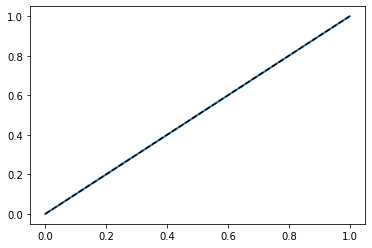

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

###### Cross Validation

In [38]:
SVC_result = cross_validation(svclassifier, X, y, 5)
print(SVC_result)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

{'Training Accuracy scores': array([0.60992366, 0.60969096, 0.60969096, 0.61007249, 0.61007249]), 'Mean Training Accuracy': 60.98901124505244, 'Training Precision scores': array([0., 0., 0., 0., 0.]), 'Mean Training Precision': 0.0, 'Training Recall scores': array([0., 0., 0., 0., 0.]), 'Mean Training Recall': 0.0, 'Training F1 scores': array([0., 0., 0., 0., 0.]), 'Mean Training F1 Score': 0.0, 'Validation Accuracy scores': array([0.6097561 , 0.61068702, 0.61068702, 0.60916031, 0.60916031]), 'Mean Validation Accuracy': 60.989015080990505, 'Validation Precision scores': array([0., 0., 0., 0., 0.]), 'Mean Validation Precision': 0.0, 'Validation Recall scores': array([0., 0., 0., 0., 0.]), 'Mean Validation Recall': 0.0, 'Validation F1 scores': array([0., 0., 0., 0., 0.]), 'Mean Validation F1 Score': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [39]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'] 
X = df[columns]
y = df.Potability 

#### División de los datos en entrenamiento y prueba

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

#### Clasificador

In [41]:
tree = DecisionTreeClassifier()

#Entrenamiento del modelo
model_tree = tree.fit(X_train, y_train)

#### Predicción de etiquetas

In [42]:
y_pred = model_tree.predict(X_test)

#### Evaluación

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.5483214649033571

In [44]:
metrics.accuracy_score(y_test, y_pred) #porcentaje de prediccion de valores verdaderos

0.5483214649033571

In [45]:
metrics.recall_score(y_test,y_pred) #indica falsos negativos

0.44221105527638194

In [46]:
metrics.precision_score(y_test,y_pred) #falsos positivos

0.44221105527638194

In [47]:
metrics.f1_score(y_test,y_pred) #media armonica entre recall y presicion

0.44221105527638194

In [48]:
matriz = metrics.confusion_matrix(y_test,y_pred)
matriz

array([[363, 222],
       [222, 176]])

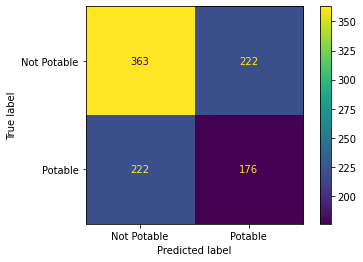

In [49]:
matriz_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Not Potable","Potable"])
matriz_plot.plot()
plt.show()

#### curva ROC y AUC

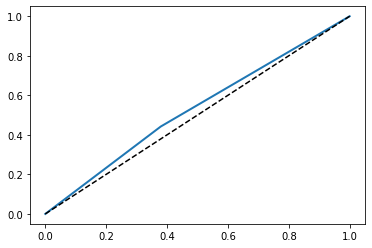

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[363 222]
 [222 176]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       585
           1       0.44      0.44      0.44       398

    accuracy                           0.55       983
   macro avg       0.53      0.53      0.53       983
weighted avg       0.55      0.55      0.55       983



##### Cross Validation

In [52]:
decision_tree_result = cross_validation(tree, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.54573171, 0.60458015, 0.59389313, 0.52366412, 0.58778626]), 'Mean Validation Accuracy': 57.11310742878422, 'Validation Precision scores': array([0.416     , 0.49230769, 0.47791165, 0.38235294, 0.47328244]), 'Mean Validation Precision': 0.44837094456371995, 'Validation Recall scores': array([0.40625   , 0.50196078, 0.46666667, 0.35546875, 0.484375  ]), 'Mean Validation Recall': 0.4429442401960785, 'Validation F1 scores': array([0.41106719, 0.49708738, 0.47222222, 0.36842105, 0.47876448]), 'Mean Validation F1 Score': 0.44551246518698917}


#### Calibración 2

In [53]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth =3, splitter = "best")

#Entrenamiento del modelo
model_tree = tree.fit(X_train, y_train)

In [54]:
y_pred = model_tree.predict(X_test)

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.62970498474059

In [56]:
metrics.accuracy_score(y_test, y_pred) #porcentaje de prediccion de valores verdaderos

0.62970498474059

In [57]:
metrics.recall_score(y_test,y_pred) #indica falsos negativos

0.18341708542713567

In [58]:
metrics.precision_score(y_test,y_pred) #falsos positivos

0.6517857142857143

In [59]:
metrics.f1_score(y_test,y_pred) #media armonica entre recall y presicion

0.28627450980392155

In [60]:
matriz = metrics.confusion_matrix(y_test,y_pred)
matriz

array([[546,  39],
       [325,  73]])

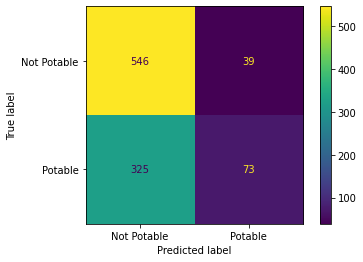

In [61]:
matriz_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Not Potable","Potable"])
matriz_plot.plot()
plt.show()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[546  39]
 [325  73]]
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.65      0.18      0.29       398

    accuracy                           0.63       983
   macro avg       0.64      0.56      0.52       983
weighted avg       0.64      0.63      0.56       983



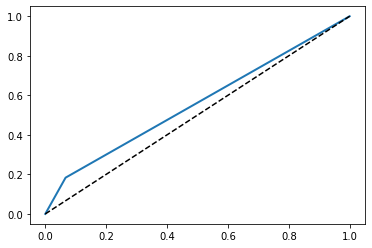

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

In [64]:
decision_tree_result = cross_validation(tree, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.62519084, 0.62914918, 0.6474628 , 0.6486074 , 0.65318581]), 'Mean Training Accuracy': 64.07192057107741, 'Training Precision scores': array([0.9       , 0.54820416, 0.75647668, 0.62531017, 0.62363239]), 'Mean Training Precision': 0.6907246803091229, 'Training Recall scores': array([0.04403131, 0.28347996, 0.1427175 , 0.24657534, 0.27886497]), 'Mean Training Recall': 0.19913381654433357, 'Training F1 scores': array([0.08395522, 0.37371134, 0.24013158, 0.35368421, 0.38539554]), 'Mean Training F1 Score': 0.28737557821716436, 'Validation Accuracy scores': array([0.61737805, 0.64580153, 0.61679389, 0.58320611, 0.62290076]), 'Mean Validation Accuracy': 61.72160677713647, 'Validation Precision scores': array([0.69230769, 0.5982906 , 0.53125   , 0.43089431, 0.536     ]), 'Mean Validation Precision': 0.5577485199082759, 'Validation Recall scores': array([0.03515625, 0.2745098 , 0.13333333, 0.20703125, 0.26171875]), 'Mean Validation Recall': 0.18234987745098

#### Calibración 3

In [65]:
tree = DecisionTreeClassifier( max_depth =2, splitter = "best")

#Entrenamiento del modelo
model_tree = tree.fit(X_train, y_train)

In [66]:
y_pred = model_tree.predict(X_test)

In [67]:
metrics.accuracy_score(y_test, y_pred)

0.6042726347914548

In [68]:
metrics.accuracy_score(y_test, y_pred) #porcentaje de prediccion de valores verdaderos

0.6042726347914548

In [69]:
metrics.recall_score(y_test,y_pred) #indica falsos negativos

0.10301507537688442

In [70]:
metrics.precision_score(y_test,y_pred) #falsos positivos

0.5616438356164384

In [71]:
metrics.f1_score(y_test,y_pred) #media armonica entre recall y presicion

0.17409766454352443

In [72]:
matriz = metrics.confusion_matrix(y_test,y_pred)
matriz

array([[553,  32],
       [357,  41]])

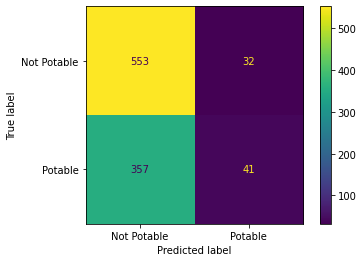

In [73]:
matriz_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Not Potable","Potable"])
matriz_plot.plot()
plt.show()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[553  32]
 [357  41]]
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       585
           1       0.56      0.10      0.17       398

    accuracy                           0.60       983
   macro avg       0.58      0.52      0.46       983
weighted avg       0.59      0.60      0.51       983



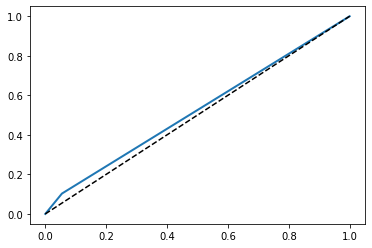

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

In [76]:
decision_tree_result = cross_validation(tree, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.62290076, 0.62190004, 0.63487219, 0.64669973, 0.63181992]), 'Mean Training Accuracy': 63.16385273379137, 'Training Precision scores': array([0.94736842, 0.84782609, 0.64102564, 0.63043478, 0.69387755]), 'Mean Training Precision': 0.7521064965327796, 'Training Recall scores': array([0.03522505, 0.03812317, 0.14662757, 0.22700587, 0.09980431]), 'Mean Training Recall': 0.10935719163735072, 'Training F1 scores': array([0.06792453, 0.07296539, 0.23866348, 0.33381295, 0.17450813]), 'Mean Training F1 Score': 0.1775748954492533, 'Validation Accuracy scores': array([0.60670732, 0.63053435, 0.58778626, 0.59541985, 0.61374046]), 'Mean Validation Accuracy': 60.68376466207409, 'Validation Precision scores': array([0.33333333, 0.93333333, 0.4137931 , 0.46086957, 0.5483871 ]), 'Mean Validation Precision': 0.5379432864213054, 'Validation Recall scores': array([0.0078125 , 0.05490196, 0.14117647, 0.20703125, 0.06640625]), 'Mean Validation Recall': 0.095465686274509

## Análisis de Resultados

Después de analizar llevar a cabo el proceso de normalización de datos, entrenamiento de los modelos, calibración de los hiperparámetros de los modelos, la evaluación y la validación cruzada, fue posible determinar que el método de clasificación que mejor se adapta a los datos es el de Support Vector Classifier, con los siguientes hiperparámetros: 

kernel='rbf'

En el que obtuvimos los siguientes resultados: 

precision_score de 0.74 y un accuracy mayor a 0.65 de igual manera, siendo el algoritmo de clasificación con los mejores resultados. 